## Observations and Insights 

* Capomulin and Ramicane resulted in similarly low final Tumor Volumes.
* Capomulin and Ramicane also had the lowest variances in regards to Tumor Volumes
    * These drug regimens are effective and consistent at reducing tumor size
* Mouse Weight and average Tumor Volume correlated quite strongly. 

In [101]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = mouse_metadata.merge(study_results, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_study_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [103]:
# Check the number of mice.
print(f"Number of mice: {len(mouse_study_df['Mouse ID'].unique())}")

Number of mice: 249


In [104]:
# Drop duplicate Timepoint values for each Mouse ID, done in place 
mouse_study_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], inplace=True)

## Summary Statistics

In [105]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_groups = mouse_study_df.groupby(['Drug Regimen'])

summary_df = pd.DataFrame({'Mean': drug_groups['Tumor Volume (mm3)'].mean(),
                           'Median': drug_groups['Tumor Volume (mm3)'].median(),
                           'Variance': drug_groups['Tumor Volume (mm3)'].var(),
                           'Standard Deviation': drug_groups['Tumor Volume (mm3)'].std(),
                           'SEM': drug_groups['Tumor Volume (mm3)'].sem()
                          })
summary_df.rename_axis('Tumor Volume (mm3)')

,Mean,Median,Variance,Standard Deviation,SEM
Tumor Volume (mm3),,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

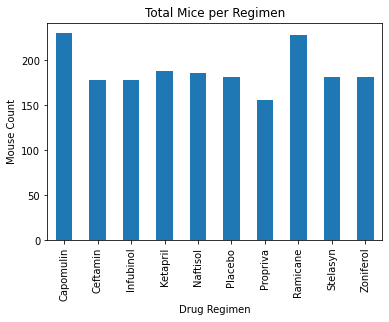

In [106]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 
pd_bar_chart = drug_groups['Mouse ID'].count().plot.bar(title='Total Mice per Regimen', y='Mouse Count').set_ylabel('Mouse Count')

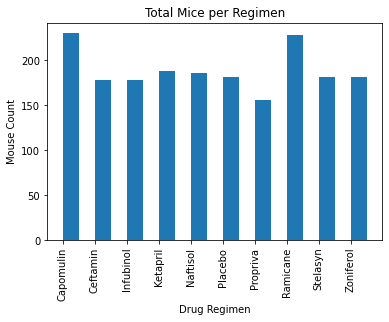

In [107]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Mouse Count')
plt.title('Total Mice per Regimen')
plot_bar_chart = plt.bar(drug_groups.count().index, drug_groups['Mouse ID'].count(), width=0.5, align='edge')


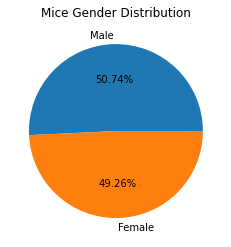

In [108]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice
pd_pie_chart = mouse_study_df['Sex'].value_counts().plot.pie(title='Mice Gender Distribution', autopct='%.2f%%')
plt.ylabel('')
plt.show()

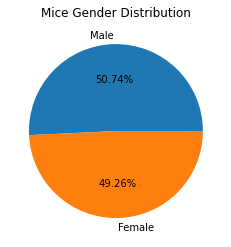

In [109]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice
plt.title('Mice Gender Distribution')
labels = ['Male', 'Female']
plot_pie_chart = plt.pie(mouse_study_df['Sex'].value_counts(), autopct='%.2f%%', labels=labels)

## Quartiles, Outliers and Boxplots

In [110]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# get subset of mouse_study comparing against the regimens. Get max timepoint for each mouse
final_time_df = pd.DataFrame(mouse_study_df.loc[mouse_study_df['Drug Regimen'].isin(regimens)].groupby('Mouse ID')['Timepoint'].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_volume_df = final_time_df.merge(mouse_study_df, on=['Mouse ID', 'Timepoint'])
final_volume_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [127]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

for drug in regimens:
    fv_drug_df = final_volume_df.loc[final_volume_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    Q1 = fv_drug_df.quantile(0.25)
    Q3 = fv_drug_df.quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q1 + IQR * 1.5
    lower_limit = Q3 - IQR * 1.5
    if fv_drug_df.min() < upper_limit or fv_drug_df.max() > lower_limit:
        print(f"""Found outliers in {drug}, 
        Upper Limit:{round(upper_limit, 2)} Lower Limit:{round(lower_limit, 2)}, 
        Max:{round(fv_drug_df.max(), 2)}, Min:{round(fv_drug_df.min(), 2)} """)
    
    # Get all tumor volume values for each drug, append it as a list to tumor_vol
    tumor_vol.append(list(fv_drug_df.values))

Found outliers in Capomulin, 
        Upper Limit:44.05 Lower Limit:28.49, 
        Max:47.69, Min:23.34 
Found outliers in Ramicane, 
        Upper Limit:45.21 Lower Limit:27.01, 
        Max:45.22, Min:22.05 
Found outliers in Infubinol, 
        Upper Limit:71.26 Lower Limit:48.31, 
        Max:72.23, Min:36.32 
Found outliers in Ceftamin, 
        Upper Limit:72.09 Lower Limit:40.93, 
        Max:68.92, Min:45.0 


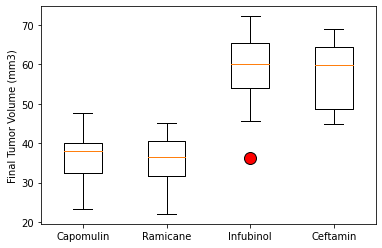

In [116]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_ylabel('Final Tumor Volume (mm3)')
flierprops = dict(marker='o', markerfacecolor='red', markersize=12, linestyle='none')
ax.boxplot(tumor_vol, labels=regimens, flierprops=flierprops)

plt.show()

## Line

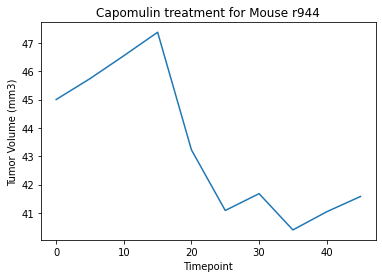

In [113]:
# sample a mouse from those that were treated with Capomulin
capomulin_mouse_sample = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == 'Capomulin'].sample()
capomulin_mouse_sample = pd.DataFrame(capomulin_mouse_sample['Mouse ID'])
capomulin_mouse_df = capomulin_mouse_sample.merge(mouse_study_df, how='left', on=['Mouse ID'])

# Generate a line plot of tumor volume vs. timepoint for the sampled mouse
plt.title(f"Capomulin treatment for Mouse {capomulin_mouse_df['Mouse ID'][0]}")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(capomulin_mouse_df['Timepoint'], capomulin_mouse_df['Tumor Volume (mm3)'])
plt.show()

## Scatter Plots and Correlation and Regression

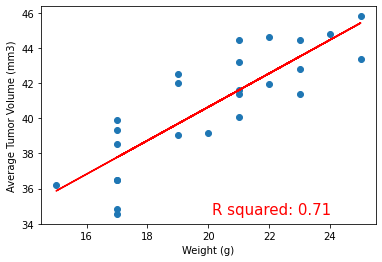

In [128]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
capomulin_mice_gb = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')

capomulin_weight = capomulin_mice_gb['Weight (g)'].mean()
capomulin_avg_volume = capomulin_mice_gb['Tumor Volume (mm3)'].mean()

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(capomulin_weight, capomulin_avg_volume)

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_weight, capomulin_avg_volume)
regress_values = capomulin_weight * slope + intercept

plt.plot(capomulin_weight,regress_values,"r-")
plt.annotate(f"R squared: {round(rvalue**2, 2)}",(capomulin_weight.mean(),capomulin_avg_volume.min()),fontsize=15,color="red")
plt.show()